In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction, \
    combine_p_and_s_predictions

# Load data

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
feature_dir = 'selected_features_constHP'
s_results_df = pd.read_csv(os.path.join(datadir, 's_models', feature_dir, 'all.stat.results.csv'))
p_results_df = pd.read_csv(os.path.join(datadir, 'p_models', feature_dir, 'all.stat.results.csv'))
p_df_2023 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.20230101.csv'))
s_df_2023 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.20230101.csv'))



In [3]:
all_p_stats = p_results_df['station']
p_pred_path = os.path.join(datadir,'p_models', feature_dir)
p_train_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'train')
p_test_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'test')
p_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.745854,YHB
1,60001352,2.250510,2.051306,YHB
2,60001367,2.155231,2.064458,YHB
3,60001392,2.076413,1.429495,YHB
4,60001397,2.273901,2.054309,YHB
...,...,...,...,...
588,60456897,2.121661,2.361038,YDD
589,60456907,3.098341,3.198689,YDD
590,60470442,1.697778,1.462730,YDD
591,60513762,1.051296,0.868705,YDD


In [4]:
p_holdout_preds_df = combine_prediction_files(p_df_2023['station'].unique(), p_pred_path,'P', 'holdout')
p_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.169807,YHH
1,60529052,1.338398,1.049498,YHH
2,60529182,2.608960,2.289284,YHH
3,60529562,0.843194,0.737601,YHH
4,60529752,1.289612,1.283531,YHH
...,...,...,...,...
14,60554577,1.558406,1.837201,FLWY
15,60556087,1.402305,1.234699,FLWY
16,60556132,1.403297,1.871400,FLWY
17,60556617,1.858090,1.679217,FLWY


In [5]:
all_s_stats = s_results_df['station']
s_pred_path = os.path.join(datadir,'s_models', feature_dir)
s_train_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'train')
s_test_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'test')
s_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.736525,YHB
1,60001367,2.155231,2.054870,YHB
2,60001437,2.543478,2.464974,YHB
3,60001517,2.080642,2.161423,YHB
4,60001572,1.630087,1.707947,YHB
...,...,...,...,...
239,60516997,0.857505,1.144656,YDD
240,60518152,0.756163,0.976055,YDD
241,60519152,1.920408,1.820101,YDD
242,60521912,0.755231,1.019222,YDD


In [6]:
s_holdout_preds_df = combine_prediction_files(s_df_2023['station'].unique(), s_pred_path,'S', 'holdout')
s_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.244881,YMC
1,60529052,1.338398,1.136641,YMC
2,60529562,0.843194,0.690048,YMC
3,60529752,1.289612,1.172708,YMC
4,60529762,0.986834,1.064607,YMC
...,...,...,...,...
7,60553712,1.861026,1.889634,FLWY
8,60553732,2.405604,2.367266,FLWY
9,60554092,1.788850,1.968501,FLWY
10,60554577,1.558406,1.714286,FLWY


# Average the predictions - P & S separately

In [7]:
p_test_avg_df = compute_network_avg_prediction(p_test_preds_df)
p_holdout_avg_df = compute_network_avg_prediction(p_holdout_preds_df)

In [8]:
s_test_avg_df = compute_network_avg_prediction(s_test_preds_df)
s_holdout_avg_df = compute_network_avg_prediction(s_holdout_preds_df)

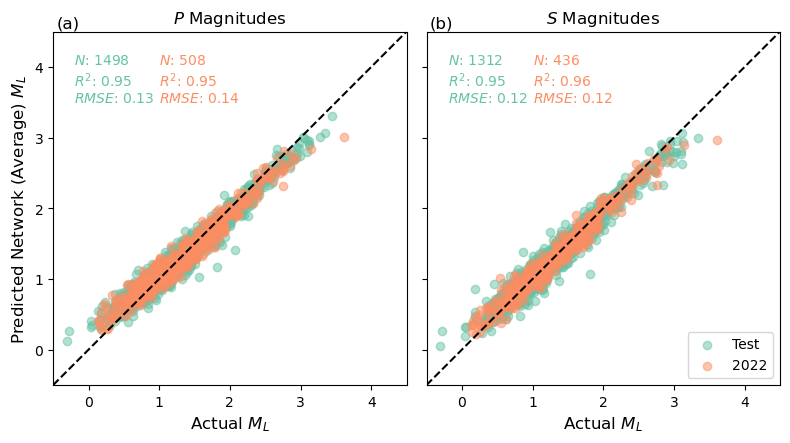

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8.0, 4.5)) #, constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_avg_df, p_holdout_avg_df],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

plotting.actual_v_network_avg_prediction([s_test_avg_df, s_holdout_avg_df],
                                    ax=axes[1],
                                    title='$\it S$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=False,
                                    plot_ytick_labels=False,
                                    linestyle='--',
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])
sp_labels = ['(a)', '(b)']
for i, ax in enumerate(axes):
    ax.text(0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)

fig.tight_layout()

# Average P and S together

In [10]:
combined_test_df = combine_p_and_s_predictions(p_test_preds_df, s_test_preds_df)
combined_test_avg_df = compute_network_avg_prediction(combined_test_df)

Original number of predictions: 19858
Filtered number of predictions: 17859


In [11]:
combined_holdout_df = combine_p_and_s_predictions(p_holdout_preds_df, s_holdout_preds_df)
combined_holdout_avg_df = compute_network_avg_prediction(combined_holdout_df)

Original number of predictions: 7046


Filtered number of predictions: 6250


In [12]:
p_test_subset_avg = compute_network_avg_prediction(combined_test_df[combined_test_df['phase']=='P'])
p_holdout_subset_avg = compute_network_avg_prediction(combined_holdout_df[combined_holdout_df['phase']=='P'])

In [13]:
s_test_subset_avg = compute_network_avg_prediction(combined_test_df[combined_test_df['phase']=='S'])
s_holdout_subset_avg = compute_network_avg_prediction(combined_holdout_df[combined_holdout_df['phase']=='S'])

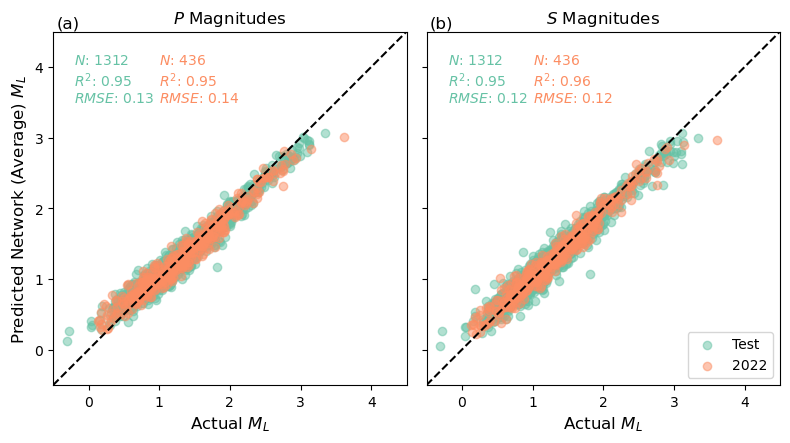

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8.0, 4.5)) #, constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_subset_avg, 
                                          p_holdout_subset_avg],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

plotting.actual_v_network_avg_prediction([s_test_subset_avg, 
                                          s_holdout_subset_avg],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=False,
                                    plot_ytick_labels=False,
                                    linestyle='--',
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

sp_labels = ['(a)', '(b)']
for i, ax in enumerate(axes):
    ax.text(0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    
fig.tight_layout()

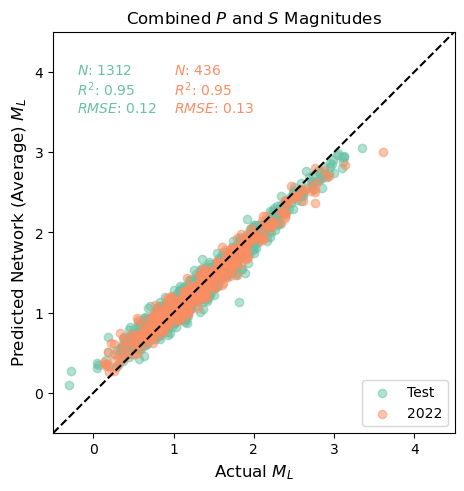

In [15]:
plotting.actual_v_network_avg_prediction([combined_test_avg_df, combined_holdout_avg_df],
                                    title='Combined $\it P$ and $\it S$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

In [16]:
print(combined_test_df[combined_test_df['phase'] == 'P'].shape[0]) #/combined_test_df.shape[0])
print(combined_test_df[combined_test_df['phase'] == 'S'].shape[0]) #/combined_test_df.shape[0])

14532
3327


In [17]:
combined_test_df.groupby('Evid').apply(lambda x: x['phase'][x['phase'] == 'P'].shape[0]).median()

11.0

In [18]:
combined_test_df.groupby('Evid').apply(lambda x: x['phase'][x['phase'] == 'S'].shape[0]).median()

2.0

In [19]:
print(combined_holdout_df[combined_holdout_df['phase'] == 'P'].shape[0]) #/combined_holdout_df.shape[0])
print(combined_holdout_df[combined_holdout_df['phase'] == 'S'].shape[0]) #/combined_holdout_df.shape[0])

5065
1185


# Put them all together

### P (all), S (all), P & S (events with P and S picks)

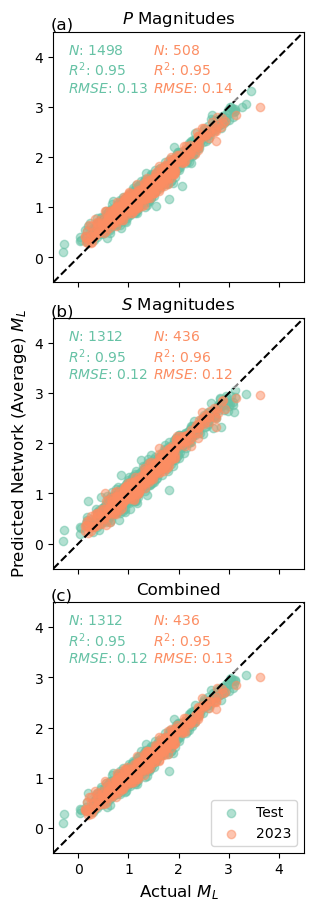

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(4, 9), constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_avg_df, p_holdout_avg_df],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([s_test_avg_df, s_holdout_avg_df],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=True,
                                    plot_ytick_labels=True,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([combined_test_avg_df, combined_holdout_avg_df],
                                         ax=axes[2],
                                    title='Combined',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2023'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])
sp_labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)

### P , S, P & S network avg for events with both P and S picks (all use same subset of events)

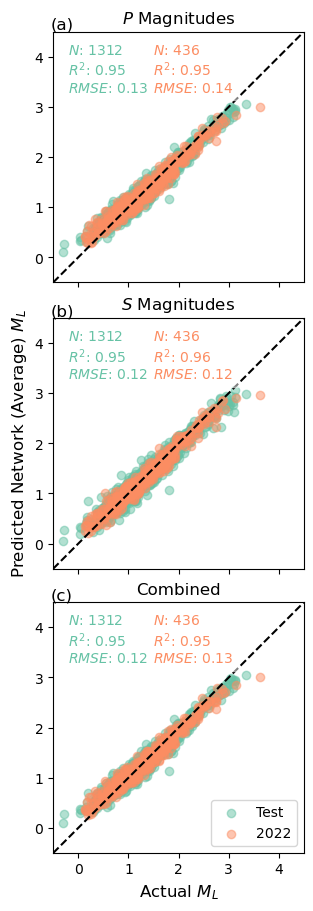

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(4, 9), constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_subset_avg, 
                                          p_holdout_subset_avg],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([s_test_subset_avg, 
                                          s_holdout_subset_avg],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=True,
                                    plot_ytick_labels=True,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([combined_test_avg_df, combined_holdout_avg_df],
                                         ax=axes[2],
                                    title='Combined',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])
sp_labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    


(-1.1, 1.1)

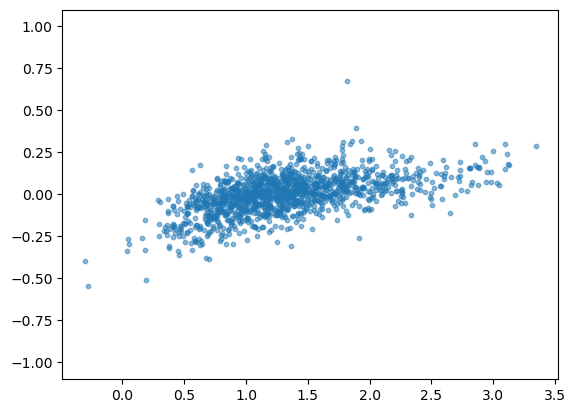

In [22]:
plt.scatter(combined_test_avg_df['magnitude'], 
            combined_test_avg_df['magnitude'] - combined_test_avg_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.ylim([-1.1, 1.1])